In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# data stuff

In [1]:
import joblib
import pandas as pd
import numpy as np
import random
from matplotlib import pyplot as plt
from sklearn.preprocessing import scale

## JORDANIAN DATA

In [2]:
PATH = '/content/drive/MyDrive/csi jordanian'
#PATH = 'Desktop/csi jordanian'
#  '/indoor-radiomap-eeepc.txt', '/indoor-radiomap-flyer.txt', '/indoor-radiomap-ipaq.txt', '/indoor-radiomap-nexus.txt', '/indoor-radiomap-desire.txt
path_Source = '/csi_list jordanian_E1.joblib'
path_Target = '/csi_list jordanian_E2.joblib' # , '/indoor-radiomap-ipaq.txt'

ACT_LABEL_FILENAME_S = PATH + '/label_A_E1.joblib' # '/content/drive/MyDrive/btp work/jordanian_data/label_activities_E2.joblib'     #'/content/drive/MyDrive/btp work/jordanian_data/label_activities.joblib'
ACT_LABEL_FILENAME_T = PATH + '/label_A_E2.joblib' # '/content/drive/MyDrive/btp work/jordanian_data/label_activities_E2.joblib'     #'/content/drive/MyDrive/btp work/jordanian_data/label_activities.joblib'
#SUBJECT_LABEL_FILENAME = '/content/drive/MyDrive/btp work/jordanian_data/label_subjects_E2.joblib'
#WORK_LABEL_FILENAME = '/content/drive/MyDrive/btp work/jordanian_data/label_work.joblib'

In [3]:
source = joblib.load(PATH + path_Source)
print(len(source))

source_label = joblib.load(ACT_LABEL_FILENAME_S)

print(len(source))
print(source_label.shape)

3000
3000
(3000,)


In [4]:
source[0].shape

(959, 90)

In [5]:
#target_train_label
#target_train

target = joblib.load(PATH + path_Target)
len(target)

target_label = joblib.load(ACT_LABEL_FILENAME_T)

print(len(target))
print(target_label.shape)

3000
(3000,)


In [6]:
lengths_S = [len(i) for i in source]
lengths_T = [len(i) for i in target]

print("lengths_S.max: ", max(lengths_S))
print("lengths_T.max: ", max(lengths_T))

#source_pad = np.zeros(shape = (len(source), 1601, 90), dtype = complex)
#target_pad = np.zeros(shape = (len(target), 1601, 90), dtype = complex)

source_pad = np.zeros(shape = (len(source), 1601, 90), dtype = complex)
target_pad = np.zeros(shape = (len(target), 1601, 90), dtype = complex)

for num in range(len(source)):
  source_pad[num, :lengths_S[num] , : ] = source[num][ : , :90]

for num in range(len(target)):
  target_pad[num, :lengths_T[num] , : ] = target[num][ : , :90]

print("source_pad.shape: ", source_pad.shape)
print("target_pad.shape: ", target_pad.shape)

lengths_S.max:  1601
lengths_T.max:  1592
source_pad.shape:  (3000, 1601, 90)
target_pad.shape:  (3000, 1601, 90)


source label:  3
target label:  3


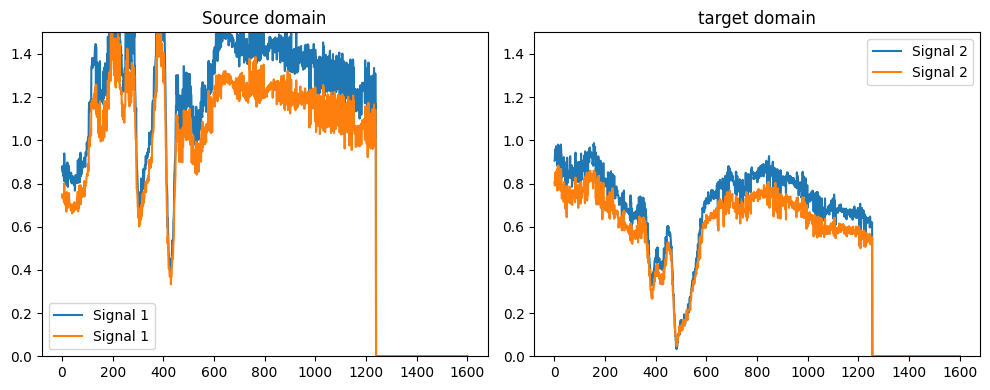

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

num = 486

# Plot the first signal in the first subplot
axes[0].plot( np.abs(source_pad[num][ : , 28:30])/30. , label='Signal 1')
axes[0].set_title('Source domain')
axes[0].set_ylim([0., 1.5])
axes[0].legend()
print("source label: ", source_label[num])

# Plot the second signal in the second subplot
axes[1].plot( np.abs(target_pad[num][ : , 28:30])/30. , label='Signal 2', )
axes[1].set_title('target domain')
axes[1].set_ylim([0., 1.5])
axes[1].legend()
print("target label: ", target_label[num])
# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

In [8]:
x = np.abs(source_pad)
phase = np.angle(source_pad)
data_loc_y = source_label

print("x.shape: ", x.shape)
print("phase.shape: ", phase.shape)
print("data_loc_y.shape: ", data_loc_y.shape)

x.shape:  (3000, 1601, 90)
phase.shape:  (3000, 1601, 90)
data_loc_y.shape:  (3000,)


## COMSNETS DATA

In [ ]:
# Load the joblib files
x = joblib.load('/content/drive/MyDrive/comsnets data csi joint/X.joblib')
data_loc_y = joblib.load('/content/drive/MyDrive/comsnets data csi joint/data_loc_Y.joblib')
data_har_y = joblib.load('/content/drive/MyDrive/comsnets data csi joint/data_har_Y.joblib')
phase = joblib.load('/content/drive/MyDrive/comsnets data csi joint/PHASE.joblib')

In [ ]:
x.shape, data_loc_y.shape, data_har_y.shape, phase.shape

((240, 52, 990), (240,), (240,), (240, 52, 990))

In [ ]:
data_loc_y[:]

array([ 0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,
        3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,
        6,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10,
       10, 10, 10, 10, 11, 11, 11, 11, 11,  0,  0,  0,  0,  0,  1,  1,  1,
        1,  1,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,
        5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  8,  8,
        8,  8,  8,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 11, 11, 11, 11,
       11,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,
        3,  3,  3,  3,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9,
       10, 10, 10, 10, 10, 11, 11, 11, 11, 11,  0,  0,  0,  0,  0,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  4,  4,  4,  4,
        4,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  8,
        8,  8,  8,  8,  9

In [ ]:
data_har_y[:]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype=int32)

In [ ]:
# Transpose x to shape (240, 990, 52)
x_transposed = x.transpose(0, 2, 1)/10.0
phase_transposed = phase.transpose(0, 2, 1)
x_transposed.shape, phase_transposed.shape

((240, 990, 52), (240, 990, 52))

In [ ]:
def lowPassFilter(inputSignalArray):
    filteredOutput = np.zeros(inputSignalArray.shape[0])
    filteredOutput[0] = inputSignalArray[0]
    #print(filteredOutput)
    for i in range(1, inputSignalArray.shape[0]):
        newVal = 0.97*filteredOutput[i-1] + .03*inputSignalArray[i]
        filteredOutput[i] = newVal
    return filteredOutput

# data processing

In [9]:
x_transposed = x
csi_magnitude_filtered = x_transposed #np.apply_along_axis(lowPassFilter, 1, x_transposed)

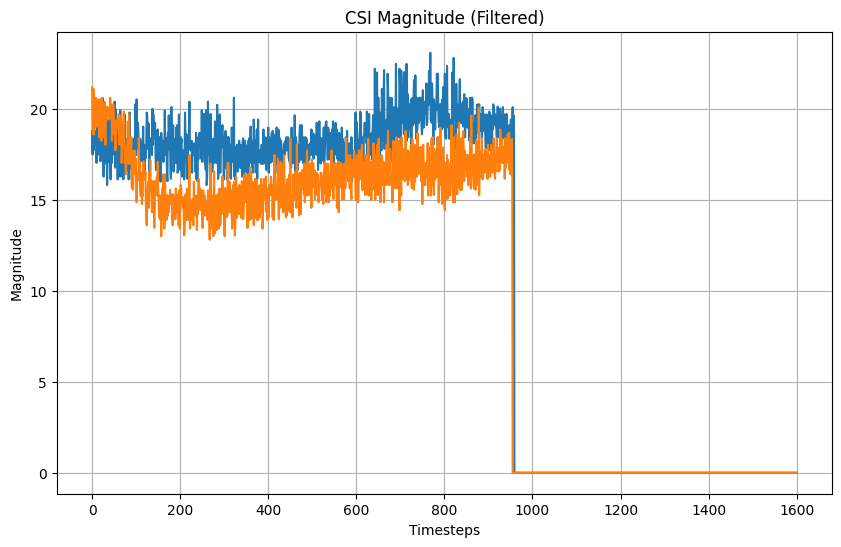

In [10]:

import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
sample_data = csi_magnitude_filtered[0:2, :, 30]  # Select the first sample and first 4 subcarriers

# Create the plot
plt.figure(figsize=(10, 6))
for i in range(sample_data.shape[0]):
  plt.plot(sample_data[i], label=f'Subcarrier {i+1}')

plt.xlabel('Timesteps')
plt.ylabel('Magnitude')
plt.title('CSI Magnitude (Filtered)')
#plt.legend()
plt.grid(True)
plt.show()


In [11]:
# prompt: unwrap each of the Phase data.
phase_transposed = phase
# Unwrap the phase data for each sample and subcarrier
phase_unwrapped = np.unwrap(phase_transposed, axis=1)

phase_unwrapped.shape


(3000, 1601, 90)

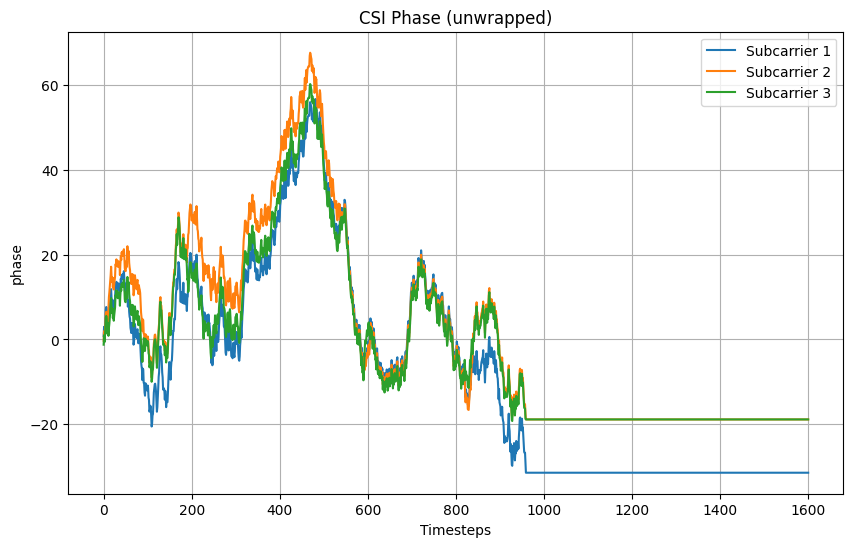

In [12]:

import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
sample_data = phase_unwrapped[0, :, :3]  # Select the first sample and first 4 subcarriers

# Create the plot
plt.figure(figsize=(10, 6))
for i in range(sample_data.shape[1]):
  plt.plot(sample_data[:, i], label=f'Subcarrier {i+1}')
#plt.plot(sample_data[10, :],) #label=f'Subcarrier {i+1}')

plt.xlabel('Timesteps')
plt.ylabel('phase')
plt.title('CSI Phase (unwrapped)')
plt.legend()
plt.grid(True)
plt.show()


In [13]:
phase_transposed.shape

(3000, 1601, 90)

In [14]:
n_subcarrier = 3
combined = np.concatenate((csi_magnitude_filtered[:, :, :n_subcarrier], phase_unwrapped[:,:,:n_subcarrier]), axis=-1)##np.concatenate((csi_amp_3, csi_phase_3), axis=-1)

In [15]:
for i in range(combined.shape[0]):
  combined[i] = scale(combined[i], with_mean=True)

combined.shape

(3000, 1601, 6)

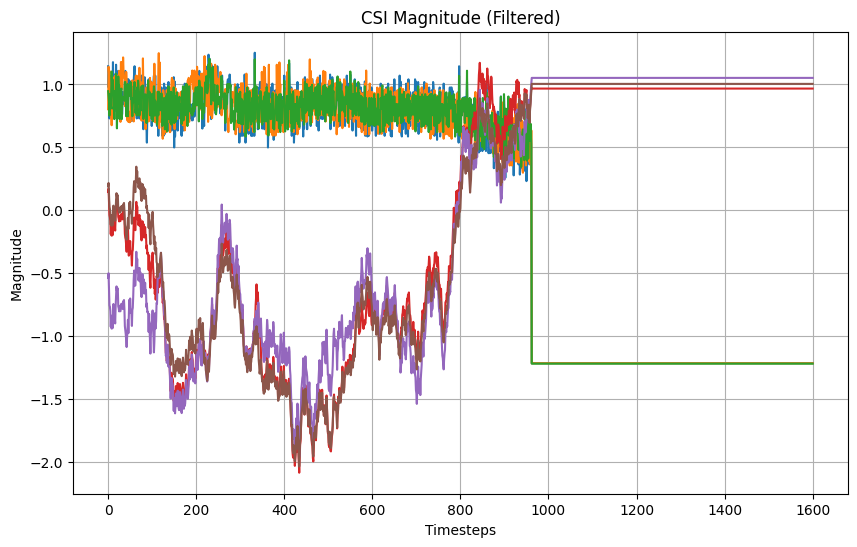

In [16]:

import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
sample_data = combined[10, :, :]  # Select the first sample and first 4 subcarriers

# Create the plot
plt.figure(figsize=(10, 6))
for i in range(sample_data.shape[1]):
  plt.plot(sample_data[:, i], label=f'Subcarrier {i+1}')
#plt.plot(sample_data[10, :],) #label=f'Subcarrier {i+1}')

plt.xlabel('Timesteps')
plt.ylabel('Magnitude')
plt.title('CSI Magnitude (Filtered)')
#plt.legend()
plt.grid(True)
plt.show()


In [17]:
np.shape(combined)

(3000, 1601, 6)

In [18]:
data_har_y = data_loc_y
np.array(data_har_y)
a, b = np.unique(data_har_y, return_counts=True)
print(a, b)

[0 1 2 3 4 5] [1200  400  400  400  400  200]


In [19]:
# Assuming data_har_y is the same as the provided array in the prompt

unique_labels, counts = np.unique(data_har_y, return_counts=True)
print(unique_labels, counts)

[0 1 2 3 4 5] [1200  400  400  400  400  200]


In [20]:
labels = np.array(data_har_y)

In [21]:
from sklearn.model_selection import train_test_split

# Assume `X` is your feature set and `y` is the corresponding labels
x_train, X_T, y_train, Y_T = train_test_split(
    combined, labels, test_size=0.4, stratify=labels, random_state=902)

print("Shape of x_trn:", x_train.shape)
print("Shape of y_trn:", y_train.shape)
print("Shape of X_T:", X_T.shape)
print("Shape of Y_T:", Y_T.shape)

Shape of x_trn: (1800, 1601, 6)
Shape of y_trn: (1800,)
Shape of X_T: (1200, 1601, 6)
Shape of Y_T: (1200,)


In [22]:
import numpy as np

def deterministic_mixup(data, labels, k=5):
    augmented_data = []
    augmented_labels = []

    unique_classes = np.unique(labels)
    for cls in unique_classes:
        cls_indices = np.where(labels == cls)[0]
        cls_data = data[cls_indices]
        cls_labels = labels[cls_indices]

        for i in range(len(cls_data)):
            for _ in range(k):
                factor = random.uniform(0.7, 0.8)
                j = np.random.choice([idx for idx in range(len(cls_data)) if idx != i])
                mixed_data = factor * cls_data[i] + (1.0 - factor) * cls_data[j]
                mixed_label = cls_labels[i]  # Since both samples belong to the same class

                augmented_data.append(mixed_data)
                augmented_labels.append(mixed_label)

    return np.array(augmented_data), np.array(augmented_labels)

#train_data = np.random.rand(150, 990, 52)
#train_labels = np.random.randint(0, 10, 150)

#k = 10  # Number of augmented samples to generate per original sample
#x_train, y_train = deterministic_mixup(x_trn, y_trn, k)

print(x_train.shape)
print(y_train.shape)

(1800, 1601, 6)
(1800,)


In [23]:
import tensorflow as tf
n_split = 300
x_train = tf.constant(x_train)
x_val = tf.constant(X_T[:n_split])
x_test = tf.constant(X_T[n_split:])

y_train = tf.constant(y_train)
y_val = tf.constant(Y_T[:n_split])
y_test = tf.constant(Y_T[n_split:])

In [24]:
# Verify shapes (optional)
print("Shapes:")
print("x_train shape:", np.shape(x_train))
print("x_val shape:", np.shape(x_val))
print("x_test shape:", np.shape(x_test))
print("y_train shape:", np.shape(y_train))
print("y_val shape:", np.shape(y_val))
print("y_test shape:", np.shape(y_test))

Shapes:
x_train shape: (1800, 1601, 6)
x_val shape: (300, 1601, 6)
x_test shape: (900, 1601, 6)
y_train shape: (1800,)
y_val shape: (300,)
y_test shape: (900,)


In [25]:
a, b = np.unique(y_train, return_counts=True)
print(a, b)

[0 1 2 3 4 5] [720 240 240 240 240 120]


In [26]:
a, b = np.unique(y_val, return_counts=True)
print(a, b)

[0 1 2 3 4 5] [125  39  43  34  38  21]


In [27]:
a, b = np.unique(y_test, return_counts=True)
print(a, b)

[0 1 2 3 4 5] [355 121 117 126 122  59]


In [28]:
# Reshape the data to add an extra dimension for the CNN
x_train = np.expand_dims(x_train, axis=-1)  # Shape: (num_samples, 200, 6, 1)
x_val = np.expand_dims(x_val, axis=-1)      # Shape: (num_samples, 200, 6, 1)
x_test = np.expand_dims(x_test, axis=-1)    # Shape: (num_samples, 200, 6, 1)

In [29]:
# Verify shapes (optional)
print("Shapes:")
print("x_train shape:", np.shape(x_train))
print("x_val shape:", np.shape(x_val))
print("x_test shape:", np.shape(x_test))
print("y_train shape:", np.shape(y_train))
print("y_val shape:", np.shape(y_val))
print("y_test shape:", np.shape(y_test))

Shapes:
x_train shape: (1800, 1601, 6, 1)
x_val shape: (300, 1601, 6, 1)
x_test shape: (900, 1601, 6, 1)
y_train shape: (1800,)
y_val shape: (300,)
y_test shape: (900,)


# Model

In [30]:
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten, Dense, Reshape,  GlobalAveragePooling1D, Masking, Input, MaxPooling1D, GlobalMaxPooling1D, Add, Dropout, BatchNormalization, UpSampling1D, Lambda, Conv2D,Concatenate,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras import models, layers, regularizers, Input

In [33]:
from tensorflow.keras import layers, models, Input


# Input layer
inputs = Input(shape=(1601, int(2*n_subcarrier), 1))
#x = layers.AveragePooling2D(pool_size=(8, 1))(inputs)

# Convolutional Layer 1
x = layers.Conv2D(3, (3, 3), activation='relu', padding='same')(inputs) #
x = layers.BatchNormalization()(x)
x = layers.AveragePooling2D(pool_size=(3, 2))(x)

# Convolutional Layer 2
x = layers.Conv2D(3, (3, 3), activation='relu', padding='same')(x) #, padding='same'
x = layers.BatchNormalization()(x)
x_b_T = layers.AveragePooling2D(pool_size=(3, 2))(x)

#x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x) #, padding='same'
#x = layers.BatchNormalization()(x)
#x_b_T = layers.AveragePooling2D(pool_size=(3, 3))(x)

# Dropout Layer
# Flatten the output to feed into fully connected layer
f = layers.Flatten()(x_b_T)
f = layers.Dropout(0.5)(f)

d1 = layers.Dense(128, activation='relu')(f)
d1 = layers.Dropout(0.5)(d1)
# Fully Connected Layer
outputs = layers.Dense(6, activation='sigmoid')(d1)  # Output layer with softmax activation for 276 classes


# Create the model
comsnet_model = models.Model(inputs=inputs, outputs=outputs)

In [34]:
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
comsnet_model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
comsnet_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 1601, 6, 1)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 1601, 6, 3)          │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 1601, 6, 3)          │              12 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_2                  │ (None, 533, 3, 3)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 533, 3, 3)           │              84 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 533, 3, 3)           │              12 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_3                  │ (None, 177, 1, 3)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 531)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 531)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          68,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 69,008 (269.56 KB)

 Trainable params: 68,996 (269.52 KB)

 Non-trainable params: 12 (48.00 B)

In [35]:
del phase, x

In [36]:
del source_pad, target_pad

In [37]:
# Define the early stopping callback
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=400, restore_best_weights=True)

# Train the model
history = comsnet_model.fit(
    np.array(x_train), np.array(y_train),
    validation_data=(x_val, y_val),
    epochs=2000,
    batch_size=64,
    callbacks=[callback]
)

Epoch 1/2000
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 150ms/step - accuracy: 0.2922 - loss: 2.2505 - val_accuracy: 0.3867 - val_loss: 1.3705
Epoch 2/2000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4239 - loss: 1.3474 - val_accuracy: 0.5200 - val_loss: 1.2069
Epoch 3/2000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4895 - loss: 1.1227 - val_accuracy: 0.5633 - val_loss: 1.0843
Epoch 4/2000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5171 - loss: 1.0825 - val_accuracy: 0.6033 - val_loss: 0.9987
Epoch 5/2000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5514 - loss: 1.0004 - val_accuracy: 0.5933 - val_loss: 0.9376
Epoch 6/2000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5710 - loss: 0.9670 - val_accuracy: 0.6233 - val_loss: 0.8866
Epoch 7/2000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5839 - loss: 0.9140 - val_accuracy: 0.6533 - val_loss: 0.8773
Epoch 8/2000
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5825 - loss: 0.8948 - val_ac

In [38]:
comsnet_model.evaluate(np.array(x_test), np.array(y_test))

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9398 - loss: 0.1632


[0.15274661779403687, 0.9433333277702332]

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step


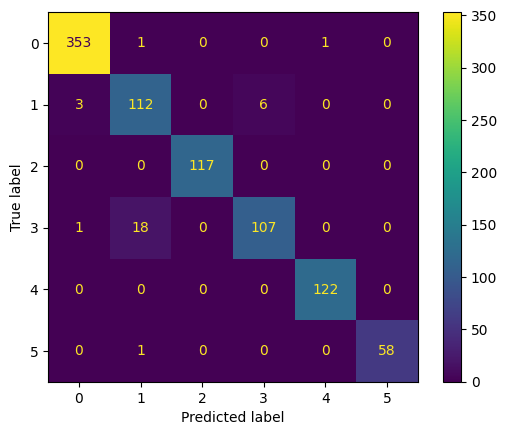

In [36]:
# prompt: plot the confusion matrix for model's. predictions on x_test taking y_test to be the true labels

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = comsnet_model.predict(np.array(x_test))
y_pred = np.argmax(y_pred, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()
